In [17]:
%reload_ext autoreload
%autoreload 2

In [18]:
from cpp_soft_info import get_KDEs
from Scratch import load_calibration_memory
from result_saver import SaverProvider

provider = SaverProvider()
all_memories = load_calibration_memory(provider, tobecalib_backend='ibm_sherbrooke', other_date='2024-03-16')
"cqtq7ex4x0mg008aj1j0"

Found jobs for backend ibm_sherbrooke with closest execution date 2024-03-15 23:54:17.000179+00:00.
{'0': 'cqtcpx3txzj0008xz2pg', '1': 'cqtcpy39nfw0008hrvx0'}


'cqtq7ex4x0mg008aj1j0'

In [19]:
print(all_memories[0]['mmr_0'].shape)

(31496,)


In [20]:
import numpy as np
from cpp_soft_info import get_KDEs

bandwiths = np.linspace(0.05, 0.9, 20)
# bandwiths = [0.1, 0.6]
# bandwiths = [0.4]*127
kde_dict = get_KDEs(all_memories, bandwiths, relError=1, absError=-1, num_points=51)

In [21]:
best_bandwiths =[]
for i in range(127):
    print(i, kde_dict[i].bestBandwidth)
    best_bandwiths.append(kde_dict[i].bestBandwidth)

print("mean:", np.mean(best_bandwiths))
print("std:", np.std(best_bandwiths))


0 0.1842105263157895
1 0.1394736842105263
2 0.2736842105263158
3 0.1842105263157895
4 0.22894736842105262
5 0.31842105263157894
6 0.22894736842105262
7 0.22894736842105262
8 0.31842105263157894
9 0.31842105263157894
10 0.22894736842105262
11 0.22894736842105262
12 0.2736842105263158
13 0.2736842105263158
14 0.22894736842105262
15 0.22894736842105262
16 0.2736842105263158
17 0.31842105263157894
18 0.22894736842105262
19 0.22894736842105262
20 0.36315789473684207
21 0.36315789473684207
22 0.2736842105263158
23 0.1842105263157895
24 0.1394736842105263
25 0.2736842105263158
26 0.22894736842105262
27 0.1842105263157895
28 0.22894736842105262
29 0.22894736842105262
30 0.22894736842105262
31 0.1842105263157895
32 0.22894736842105262
33 0.1842105263157895
34 0.31842105263157894
35 0.22894736842105262
36 0.22894736842105262
37 0.1842105263157895
38 0.22894736842105262
39 0.1842105263157895
40 0.22894736842105262
41 0.1394736842105263
42 0.31842105263157894
43 0.31842105263157894
44 0.1842105263

In [22]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 30
num_std = 3

grid_dict = generate_grid_and_estimate_density(kde_dict, num_points, num_std)
# grid_dict

Grid generation time: 6.584e-06 seconds
KDE initialization time for qubit 0: 9.58e-07 seconds
KDE evaluation time for qubit 0: 0.0243282 seconds
Conversion to Eigen time for qubit 0: 1.875e-06 seconds
KDE initialization time for qubit 1: 9.16e-07 seconds
KDE evaluation time for qubit 1: 0.0221487 seconds
Conversion to Eigen time for qubit 1: 1.625e-06 seconds
KDE initialization time for qubit 2: 3.583e-06 seconds
KDE evaluation time for qubit 2: 0.0351365 seconds
Conversion to Eigen time for qubit 2: 2.333e-06 seconds
KDE initialization time for qubit 3: 6.67e-07 seconds
KDE evaluation time for qubit 3: 0.0247217 seconds
Conversion to Eigen time for qubit 3: 2.333e-06 seconds
KDE initialization time for qubit 4: 3.75e-07 seconds
KDE evaluation time for qubit 4: 0.029479 seconds
Conversion to Eigen time for qubit 4: 2.291e-06 seconds
KDE initialization time for qubit 5: 4.59e-07 seconds
KDE evaluation time for qubit 5: 0.0390605 seconds
Conversion to Eigen time for qubit 5: 2.166e-06 se

# Plot the densities

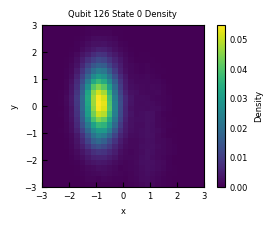

10:15:53 Warning: The following kwargs were not used by contour: 'dpi'. IN FILE: /var/folders/_3/n7zzdff5239886c9gmhrk6yr0000gn/T/ipykernel_39642/1642434427.py, LINE: 20


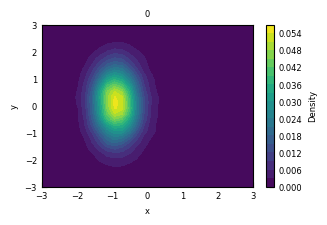

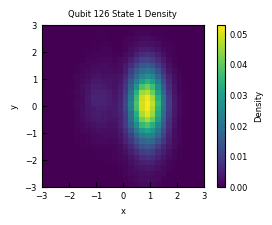

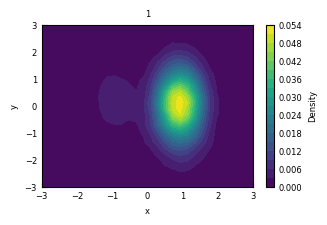

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Function to reshape and plot density
def plot_density(density, qubit_idx, state):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    plt.imshow(density_reshaped, extent=[-num_std, num_std, -num_std, num_std], origin='lower')
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_density_contour(density, qubit_idx, state, num_points, num_std, levels=20):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density_reshaped, levels=levels, cmap='viridis', dpi=300)  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(state)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Loop through each qubit and plot the densities
idx = 126
for qubit_idx, (density_0, density_1) in grid_dict.items():
    if qubit_idx != idx:
        continue
    plot_density(density_0, qubit_idx, state='0')
    plot_density_contour(density_0, qubit_idx, state='0', num_points=num_points, num_std=num_std)
    plot_density(density_1, qubit_idx, state='1')
    plot_density_contour(density_1, qubit_idx, state='1', num_points=num_points, num_std=num_std)


# Plot IQ data

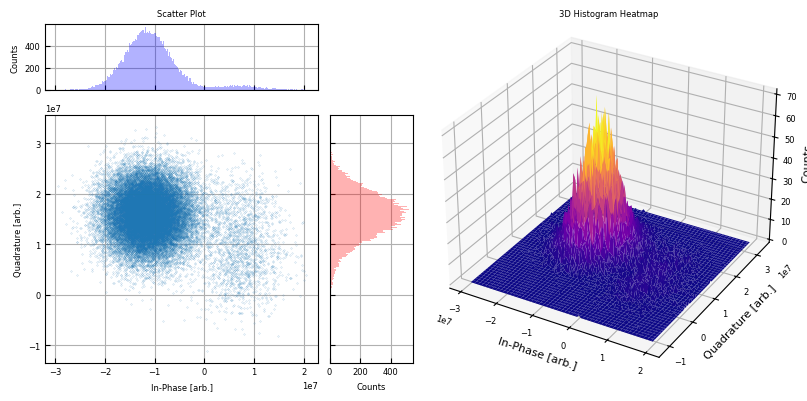

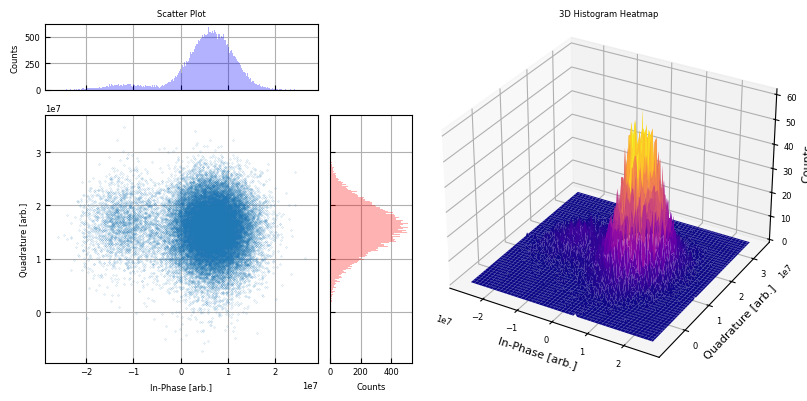

In [49]:
from soft_info import plot_IQ_data

plot_IQ_data(all_memories[idx]["mmr_0"])
plot_IQ_data(all_memories[idx]["mmr_1"])

# relError diff plot:

In [8]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 51
num_std = 3

kde_dict = get_KDEs(all_memories, bandwiths, relError=1, absError=-1)
grid_dict_relErr_1 = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 1.6459e-05 seconds
KDE initialization time for qubit 0: 1.708e-06 seconds
KDE evaluation time for qubit 0: 0.0468382 seconds
Conversion to Eigen time for qubit 0: 2.25e-06 seconds
KDE initialization time for qubit 1: 3.917e-06 seconds
KDE evaluation time for qubit 1: 0.0444505 seconds
Conversion to Eigen time for qubit 1: 1.292e-06 seconds
KDE initialization time for qubit 2: 6.334e-06 seconds
KDE evaluation time for qubit 2: 0.0730486 seconds
Conversion to Eigen time for qubit 2: 1.75e-06 seconds
KDE initialization time for qubit 3: 1.917e-06 seconds
KDE evaluation time for qubit 3: 0.0487105 seconds
Conversion to Eigen time for qubit 3: 1.292e-06 seconds
KDE initialization time for qubit 4: 4.208e-06 seconds
KDE evaluation time for qubit 4: 0.0594369 seconds
Conversion to Eigen time for qubit 4: 1.417e-06 seconds
KDE initialization time for qubit 5: 8.5e-06 seconds
KDE evaluation time for qubit 5: 0.0827808 seconds
Conversion to Eigen time for qubit 5: 1.458e-06

In [9]:
kde_dict = get_KDEs(all_memories, bandwiths, relError=-1, absError=-1)
grid_dict_relErr_None = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 2.0667e-05 seconds
KDE initialization time for qubit 0: 1.917e-06 seconds
KDE evaluation time for qubit 0: 0.0995679 seconds
Conversion to Eigen time for qubit 0: 2.166e-06 seconds
KDE initialization time for qubit 1: 1.0542e-05 seconds
KDE evaluation time for qubit 1: 0.107261 seconds
Conversion to Eigen time for qubit 1: 1.208e-06 seconds
KDE initialization time for qubit 2: 3.75e-06 seconds
KDE evaluation time for qubit 2: 0.224171 seconds
Conversion to Eigen time for qubit 2: 1.625e-06 seconds
KDE initialization time for qubit 3: 1.3458e-05 seconds
KDE evaluation time for qubit 3: 0.203513 seconds
Conversion to Eigen time for qubit 3: 1.166e-06 seconds
KDE initialization time for qubit 4: 3.708e-06 seconds
KDE evaluation time for qubit 4: 0.138001 seconds
Conversion to Eigen time for qubit 4: 1.041e-06 seconds
KDE initialization time for qubit 5: 3.417e-06 seconds
KDE evaluation time for qubit 5: 0.230353 seconds
Conversion to Eigen time for qubit 5: 1.084e-06

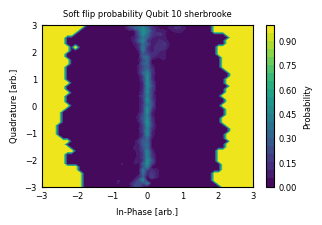

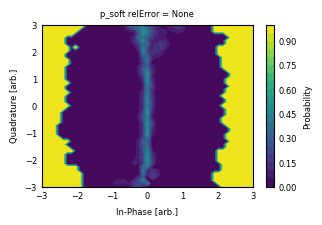

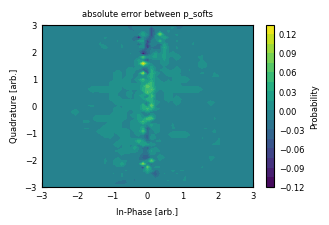

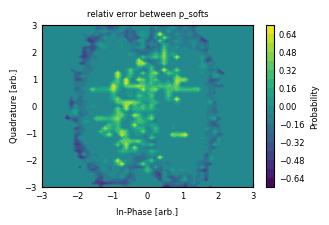

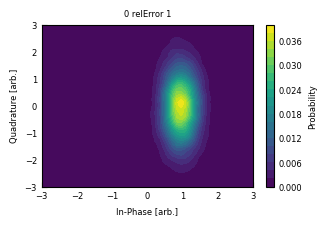

NameError: name 'density_relError_none' is not defined

In [15]:
def plot_density_contour(density, qubit_idx, state, num_points, num_std, levels=20):
    FIGURE_WIDTH_1COL = 3.404  # For PRX style, change for according to journal
    FIGURE_WIDTH_2COL = 7.057  # For PRX style, change for according to journal
    FIGURE_HEIGHT_1COL_GR = FIGURE_WIDTH_1COL*2/(1 + np.sqrt(5))
    FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL*2/(1 + np.sqrt(5))

    font_size = 6 # For PRX style, change for according to journal

    plt.rcParams.update({
        'font.size'           : font_size,  
        'figure.titlesize'    : 'medium',
        'figure.dpi'          : 100,
        'figure.figsize'      : (FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR),
        'axes.titlesize'      : 'medium',
        'axes.axisbelow'      : True,
        'xtick.direction'     : 'in',
        'xtick.labelsize'     : 'small',
        'ytick.direction'     : 'in',
        'ytick.labelsize'     : 'small',
        'image.interpolation' : 'none',
        'legend.fontsize'     : font_size,
        'axes.labelsize'      : font_size,
        'axes.titlesize'      : font_size,
        'xtick.labelsize'     : font_size,
        'ytick.labelsize'     : font_size,
    })


    plt.rcParams.update({'font.family':'sans-serif'})

    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.figure()
    plt.contourf(X, Y, density_reshaped, levels=levels, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Probability')
    plt.title(state)
    plt.xlabel('In-Phase [arb.]')
    plt.ylabel('Quadrature [arb.]')
    plt.show()

qubit = 10
logical = 1

density_relError_1 = grid_dict_relErr_1[qubit][logical]
# density_relError_none = grid_dict_relErr_None[qubit][logical]


L_relErr_1 =[]
for d1, d0 in zip(grid_dict_relErr_1[qubit][1], grid_dict_relErr_1[qubit][0]):
    L_relErr_1.append(-np.log(min(d1, d0)/(max(d1, d0)+1e-8)+1e-8))
L_relErr_1 = np.array(L_relErr_1)

L_relErr_none =[]
for d1, d0 in zip(grid_dict_relErr_None[qubit][1], grid_dict_relErr_None[qubit][0]):
    L_relErr_none.append(-np.log(min(d1, d0)/(max(d1, d0)+1e-8)+1e-8))
L_relErr_none = np.array(L_relErr_none)
L_relErr_1 = grid_dict_relErr_1[qubit][1]/(grid_dict_relErr_1[qubit][0]+1e-8)
L_relErr_none = grid_dict_relErr_None[qubit][1]/(grid_dict_relErr_None[qubit][0]+1e-8)

L_relErr_1 =[]
for d1, d0 in zip(grid_dict_relErr_1[qubit][1], grid_dict_relErr_1[qubit][0]):
    p_soft = 1 / ( 1 + max(d1, d0)/(min(d1, d0)+1e-8))
    L_relErr_1.append(p_soft)
L_relErr_1 = np.array(L_relErr_1)

L_relErr_none =[]
for d1, d0 in zip(grid_dict_relErr_None[qubit][1], grid_dict_relErr_None[qubit][0]):
    p_soft = 1 / ( 1 + max(d1, d0)/(min(d1, d0)+1e-8))
    L_relErr_none.append(p_soft)
L_relErr_none = np.array(L_relErr_none)


plot_density_contour(L_relErr_1, qubit, state=f'Soft flip probability Qubit {qubit} sherbrooke', num_points=num_points, num_std=num_std, levels=20)
plot_density_contour(L_relErr_none, qubit, state='p_soft relError = None', num_points=num_points, num_std=num_std, levels=20)

plot_density_contour((L_relErr_1-L_relErr_none), qubit, state='absolute error between p_softs', num_points=num_points, num_std=num_std)
plot_density_contour((L_relErr_1-L_relErr_none)/(L_relErr_1/2+L_relErr_none/2 + 1e-8), qubit, state='relativ error between p_softs', num_points=num_points, num_std=num_std)





plot_density_contour(density_relError_1, qubit, state='0 relError 1', num_points=num_points, num_std=num_std)
plot_density_contour(density_relError_none, qubit, state='0 relError None', num_points=num_points, num_std=num_std)
plot_density_contour((density_relError_1-density_relError_none)/(density_relError_1/2 + density_relError_none/2+1e-8), qubit, state='relative diff', num_points=num_points, num_std=num_std)
# 